дз 1 задача 2

In [26]:
import math
import matplotlib.pyplot as plt

In [27]:
MPa = 10 ** 6
kPa = 10 ** 3

In [28]:
p_0 = 5
t_0 = 450 + 273.15
p_2_lis = [5, 10, 15, 20, 50]

In [29]:
def cycl(p_2):
    p_2 = p_2 * kPa
    p_1 = p_0 * MPa
    cp = 4400
    cv = 3100
    k = cp / cv
    res = 1 - (p_2 / p_1)**((k - 1) / k)
    return res

In [30]:
x_val = [p_2 for p_2 in p_2_lis]
y_val = [cycl(p_2) for p_2 in p_2_lis]

Text(0.5, 1.0, 'график зависимости термического КПД')

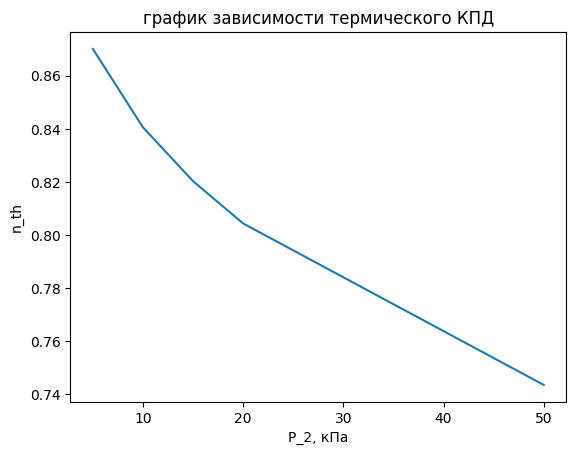

In [31]:
plt.plot(x_val, y_val)
plt.xlabel('P_2, кПа')
plt.ylabel('n_th')
plt.title('график зависимости термического КПД')